In [1]:
import keras
import tensorflow as tf

tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True

#Importing the VAE and RNN.
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

Using TensorFlow backend.


/home/kaiolae/code/word_models_keras_test/WorldModels


In [2]:
import fnmatch
def get_all_models():
    all_models = {} #Dict of all models, with num mixtures as key
    for folder in os.listdir('../'):
        
        if fnmatch.fnmatch(folder, 'trained_sequential_rnn_*') :
            mixtures_start_index = folder.find('rnn_')+4
            mixtures_end_index = folder.find('mixtures')
            num_mixtures = int(folder[mixtures_start_index:mixtures_end_index])
            if num_mixtures in all_models.keys():
                all_models[num_mixtures].append("../"+folder)
            else:
                all_models[num_mixtures] = ["../"+folder]
            
    return all_models
            
print(get_all_models())

{1: ['../trained_sequential_rnn_1mixtures_run10', '../trained_sequential_rnn_1mixtures_run5', '../trained_sequential_rnn_1mixtures_run2', '../trained_sequential_rnn_1mixtures_run7', '../trained_sequential_rnn_1mixtures_run11', '../trained_sequential_rnn_1mixtures_run13', '../trained_sequential_rnn_1mixtures_run9', '../trained_sequential_rnn_1mixtures_run1', '../trained_sequential_rnn_1mixtures_run14', '../trained_sequential_rnn_1mixtures_run6', '../trained_sequential_rnn_1mixtures_run3', '../trained_sequential_rnn_1mixtures_run12', '../trained_sequential_rnn_1mixtures_run8', '../trained_sequential_rnn_1mixtures_run4'], 2: ['../trained_sequential_rnn_2mixtures_run12', '../trained_sequential_rnn_2mixtures_run3', '../trained_sequential_rnn_2mixtures_run11', '../trained_sequential_rnn_2mixtures_run13', '../trained_sequential_rnn_2mixtures_run7', '../trained_sequential_rnn_2mixtures_run8', '../trained_sequential_rnn_2mixtures_run2', '../trained_sequential_rnn_2mixtures_run14', '../trained_s

In [6]:
#Getting training history

training_histories = {}
filename = "training_history.h5"
model_name = "rnn_trained_model.h5"
for key, val in get_all_models().items():
    training_histories[key] = []
    for folder_name in val:
        if model_name not in os.listdir(folder_name):
            print("Unfinished run. Skipping.")
            continue
        training_histories[key].append(folder_name+"/"+filename)

print("histories: ", training_histories)

Unfinished run. Skipping.
Unfinished run. Skipping.
histories:  {1: ['../trained_sequential_rnn_1mixtures_run2/training_history.h5', '../trained_sequential_rnn_1mixtures_run7/training_history.h5', '../trained_sequential_rnn_1mixtures_run11/training_history.h5', '../trained_sequential_rnn_1mixtures_run13/training_history.h5', '../trained_sequential_rnn_1mixtures_run9/training_history.h5', '../trained_sequential_rnn_1mixtures_run1/training_history.h5', '../trained_sequential_rnn_1mixtures_run14/training_history.h5', '../trained_sequential_rnn_1mixtures_run6/training_history.h5', '../trained_sequential_rnn_1mixtures_run3/training_history.h5', '../trained_sequential_rnn_1mixtures_run12/training_history.h5', '../trained_sequential_rnn_1mixtures_run8/training_history.h5', '../trained_sequential_rnn_1mixtures_run4/training_history.h5'], 2: ['../trained_sequential_rnn_2mixtures_run12/training_history.h5', '../trained_sequential_rnn_2mixtures_run3/training_history.h5', '../trained_sequential_rn

In [17]:
import pickle
loss_summary = []
for num_mixtures, history_files in training_histories.items():
    for history_file in history_files:
        with open(history_file, 'rb') as file:
            content=pickle.load(file)
            content['num_mixtures'] = num_mixtures
            loss_summary.append(content)
print(loss_summary)


[{'val_loss': [-63.416952123611395, -70.2389017374498, -73.09003079432532, -75.53313872761576, -77.42428657924502, -79.28022735325229, -80.07256685847182, -81.18752710959967, -81.5147706991588, -81.79680734311053, -82.22006577691918, -82.31168784771509, -81.24497313883403, -82.14303275605945, -80.44601040443969, -81.23621974213492, -79.44353428681842, -79.80055702723087, -79.33376569206617, -77.80797727075182, -78.72882442024773, -78.07936993735075, -77.9558021207317, -76.39812433112236, -77.48927013117391, -75.8483570275117, -75.87121989210439, -75.79035335557316, -74.66750994557685, -73.86364489200541, -74.16194037333673, -73.62596314466384, -71.41328370326109, -70.26013732915911, -70.24843921463557, -71.6586068944843, -70.13106959035616, -67.96831315206218, -67.12769915749617, -65.45719530169254, -65.77922262486345, -63.61489473127451, -64.2340077822644, -60.5817773694163, -60.21066287172171, -61.7090211439915, -59.808509669267025, -58.2633563242205, -52.923854833204025, -52.7764862

                                                 loss  num_mixtures  \
0   [-45.488163759968515, -67.91700660864402, -72....             1   
1   [-45.07735284372207, -67.23468671323113, -73.1...             1   
2   [-45.7959565930483, -68.13618316252285, -73.00...             1   
3   [-46.518994137258375, -68.28607388811176, -73....             1   
4   [-44.90394608686669, -67.17091577618363, -72.3...             1   
5   [-44.6095704979031, -67.67144239167806, -73.12...             1   
6   [-44.692951898365116, -67.61185298802074, -72....             1   
7   [-44.8219189197071, -67.87650349566582, -72.85...             1   
8   [-46.26094623480569, -67.51806366176412, -73.5...             1   
9   [-45.679335878715555, -67.68455695364588, -72....             1   
10  [-44.658502187790326, -67.02765252822365, -72....             1   
11  [-44.5180545267501, -67.18397799589835, -72.51...             1   
12  [-58.85624162465656, -80.66333552363022, -85.5...             2   
13  [-

TypeError: unhashable type: 'list'

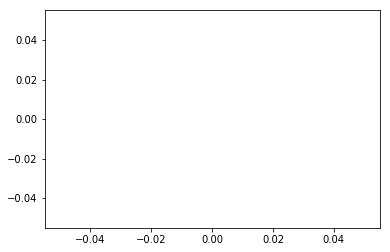

In [25]:
import pandas as pd
import seaborn as sns
loss_data = pd.DataFrame(loss_summary)
#Adding index column TODO Adjust wrt num epochs
loss_data["epoch"] = range(1, len(loss_data)+1)
print(loss_data)
sns.lineplot(x="epoch", y="loss", hue="num_mixtures", data=loss_data)


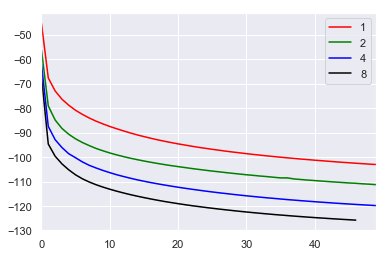

In [41]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 1], color="red", condition="1")
sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 2], color="green", condition="2")
sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 4], color="blue", condition="4")
sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 8], color="black", condition="8")
plt.legend()